<a href="https://colab.research.google.com/github/jakubhorvath/VariousMLNotebooks/blob/main/BERT_SHAP_analysis_PUBLIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load necessary packages

In [ ]:
!pip install transformers
!pip install tensorflow
!pip install shap
!pip install biopython

## Run on GPU if available, CPU otherwise


In [ ]:
import torch

if torch.cuda.is_available():

    # Tell PyTorch to use the GPU.
    device = torch.device("cuda")

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")


No GPU available, using the CPU instead.


## Define helper functions

In [ ]:
 # the kmer splitting function
def Kmers_funct(seq, size=6):
   return [seq[x:x+size].upper() for x in range(len(seq) - size + 1)]
def tok_func(x): return " ".join(Kmers_funct(x))

## Load sequences
- Some sample sequences are provided
- Alternatively use your custom sequences

In [ ]:
#TODO load your sequences here and remove the other LTR_sequences array
LTR_sequences = []

LTR_sequences = ['GCACATGGCCTAGCACACGGGCGTGTGGCTTCCCCGTGTGACCTTTGCACCTTAATTTCATAAATTAATATGTTCACATAGCCTTGCACACGGGCATGTGGCTTGGCTGTGTGACCCAAGTCAGAGAGTTACACGGGTATGGACACGAGCTAGGACATGGTCGTGTGCCTCACGTCGAATGCCCACACAGCCTAAGACATGGGCATGTCTCTTGGCCTGGCCATATGGGCGTGTGTGCCCTGCACCTAAGGAAAATTTTAAATTTTTACGAAAAATTCCCTGAGTTTCCAGTTTAGTCCCGATTCATTTCTACTGTGTATTTTGGGCCTCGAGGGCTCATATAAGGGCCA',
 'GTCAAACCAAACGACACCGCTCCACTTAATGAGCATACATTGGGCCTGAGTAAGTCGAAGCCCACTACGAATACATGCCAAACCCAAACACTCCAACGGTCACCAGCGGTAGAGCTACATGACAAAGGAAGAGCAACGATGAAGGAGCTGTGTACGAAAAGCAAAAGCAGCCCCGTCCCTATCCACAATCGTTACAGCTCTCTACAGCTGTCAGACTAGTCAGAGTGTTCTACGTGTATTAGGGCTTCCCAATGTATTCACCTATAAGTAGACATGCTTTGTAAACGTTGATGTTAAGCGAAATCAATAAGAAAGATTCGACTTCCTTTACCTTTCTTTCACCTTTCGCA',
 'GATAGCAACCTAGAAACGAGACCCAAAAGGAGAATCAGAGCACCTACCTACCTGAAGGACTTCACTAGCCGTTAACAACCGTTGAAAGGAGCCATGATGAGCTGGAATTGCTGAGCTGGATATCAGGGGAATAGCCCTTGATCCTTATCTGCCATTACTAAGAATATTCCCTTTCTGTTAGGATCTGTCCACACAAAAATACAAATTCTGTTATTGTAATTTCATTATAAATACTCATTTAATGAAAGAAGGCAGATGAACATTTCGAATTCAATACTTATCTTCTTATTTTCGTGCTTGGGAGGTCTGGCCCTCGAAGTCCAGTGATTGATTATTGATCAATCATAACA',
 'GTTAAGTTAATACTTGCATGATAATGTACACTTGTCAAGCTTTTGTTATACTTTGCTTCATTGTAGTGGTCATTAGTCATGCATGTTTTCTACTAATTCCATCTCCTACGTGTATAGCTGCATGAGTTTGTTGTCTTTATGCCATAACACCTGTGTCTATAGTATGTTACAAGTGTTAATCATGCCTACTGCATATTTAACTTGTACTTTAATCTGATCAATGAAGCATACTTGCAGTTTCTTGTAACCATCGATAGTATTTCTTTCAAGTTTTGAAAGCCTTTCTGTTTTAGTTTTATAACAAAGTATCTTTGACAACTTGCTCTCTGTTAAAGACTAGAAATATAACA',
 'GTTGGAACACACTCGGTGGCTAGGGTTTCTCGGCAGAGAAGAAGTACAAAGAGGAAAGAAGAATAAGGGATACATTTAGGGTTTCGGTTTATTAGAGTCAAAGAGGTCAACAGAAGTCGTAGGTCAAGGCAGACTGAGAAGTCAACAGAAGTCAGAAGTCAAGGCAGACTGCACCATGTCTATAGGCACTCCACCTGTGTCAATAACAGACTCAGAATTAGTTAGTTGCACTAATACCTAATTCTGTTTTTCTCTCTCTCTAATTGTACTTAGTATAAATAAGATTGTAACTAAAGAAAGATAACGAGTGATTGAATAAAATTGAAGTTTCACAAGTGAGAAATCTTACA',
 'GGCTTCAAGCTCAGCATACAACATCCACAAGCATCACAACCACAAGGCACAACAAACCTCTTCTCATCAAGGAGAAGCAAGAACAAGATCAAGGAGGGAGAAGGAGAAGCAAGGAACGTGAGGGAAGCTGGAGGGGAAAGTGAAGAACAAACCCTTGATCAGCCAAGGGAAAGAGTAAGTAAGGTAGAGAGTAAAGCACGGGTCAAAGGTCAACGAAGACGGCTGCAGCCGCCGGAAACCGCAGGGGCGGCAGCCAGGGCCGCAGGAGCGGAAACCCGCAGGGGCGGCACCCCCATCCGCGGGTGCGGCTAAGCCACAACTCGGTCAAAACTAGTCTCGGCTAAAGATCA',
 'GCTTGAGCAACGGAACGAGTTAAGGGAGGTTCAACTGGGAATGAGGCCGGATCAAGCCTCCGTGCCTTACCTATGTTGAATATAATATGCAAGAAAGATAATCAAAGTTGATGAGAAACACCCTCTTCAAACCAGATGGGAAATAACTTCTCTGATTCTCATTCATACTCCCTTACAATAATATAGTTCTCACGTTATTCAACTTGCCAAAAATAAACATAATAAGTAAATTGATTACTAATTGATTTATTCCCAAAACAGAGCAATATTGCCAAAACAAAACATTTCCTAAACTTGCTGGACGTCCTTCCTTATTCATGTTGCACCTTCCTTAATTGGTCCCCGTAACA',
 'GTTAAAACCTTTGCACATAAGGTGCTTGATAAAAAGACTGAGCAAAACAGAGAGTGTAAAACCTCTGGAACGAAAACTGTTCTGTATATTTTCTCTTGCTGTTAAAGCTTTACAATGGTGTGAATTTATACACTTGTGGTCTATGAGAGAGAGAGAAATAAAACAATGATTTCTATAACTGAACCAATGACAGACAGCCACATCAACATTCGGTTATAACAGAAATATTCTCTGCTGCATGTGAGGTCTCTGCTGTAGATGAAGTGCCCCGTGACATTCCCGAATATTCCTTTGTAGTGTTGTTGTCTAACAGAGTTGGGGAACTAGGTGTAGAGGATTTATTTGTCTCA',
 'GTTGGATAACCTCAATGCGGACCCCAAAAAAAAAGGCAAAGAAGTCAATTTTCAAGATCTTGAAGTTGTAAAATGTGATCACGCGTGAATGGTAATAGGAGAAAGATAGCTACCAATTATTTAGATAAGATTATGCATTTAATTCTTCCTTATCATGTATTAGCAAGCTTGTACTATATAAATGCATGTAGAAAGCCTAGTATGCGTGAGTGCTAAGTAAGGAAAAATATTTTGCTCTCCAAAAAAATAATTCTCATCACACCTCCATCCGTGTACCTGAAATATTCCAGTCCATTTATTCCTTGTCCTCACACACGCACTCAAAAATAAAAAAACACTTAAAAATAACA',
 'GAAACTAGTTTCGAGGACCAGGGCCTCCATGGATAAGAGAAGAGAAATCAAATAAAGGTAATTTTTCATTCCTCTTGCTTGCTTATTTACATAGTTATATATACTATTCCTTAGTAGCATAATTCTTATCTTTTCGTGCAAAAGGAATACTACAAAATCAGAGTTTGTTAAGCTTGTCCCTTGCTAGTCGACAAGCACCAAGCAAGATTGTAGCTGCCAAATTCCCACCTCACCCTCAAACATAATCCTTGAGGTAAGATGGCTTCGAAATTGCCCTCTTGGGCTTTCCTTCTCTTTGCACCCTTGCTACTACTCCTATCCTTGTGTGTTCTGCTTCTGTTTCCTTATCA',
 'AGGAATAGAAAACAAGAAGGAAGAGAAAAGCCTAGCTTCGAGGGCTAGGTAACCTCCAGAGAAAGACCAAGGAAAGGAAATTTGTATTATTTTTCTTCTGCTTTCCATTATAAGCTGCGATTCTATATATAAGCATCAACAAGGATGTTGCCAAATAAAACAAAAACAAAATGGAAAAGCACTACATAACAGAAATGGAATATTCCTAGACAAACTGCAGACAACATCTACTCCCTAGCCACTAACATCCTACCAACTCAGTTGCTCCTAACGGAATGGATTATATGAAATCCACCAAATGTCTGGGTGGTATAATCTTCCTTTTGGACCTTATGTTCCCTTGCCTATCA',
 'GCTGGTGATACGCGGAGATACCTTACGGTTATCCGCACCCCTTTGCTAGGCAGACACAGTTGTGTCCGATGGCAAGCAGAGACCAAGTCTGGTCATTCTGCACACATGATACGCGGAGATACCTTACGGTTATCCGCACCCCTTTGCTAGGCAGACACAGTTGTGTCCGATGGCAAGCAGAGACCAAGTCTGGTCATTCTGCACACATGATACGCGGAGATACCTTACGGTTATCCGCACCCCTTTGCTAGGCAGACACAGTTGTGTCCGATGGCAAGCAGAGACCAAGTTTGGTCATTCTGCACACATGATACGCGGAGATACCTTACGGTTATCCGCACCCCTTTGCT',
 'TTCATGGGGCTCCGAAAAAAGAGGGAGAATGGAGGATTGCCTTGAGGGTCCGCACTTAGGCAATCATGAAACACAGCTCCAAACTCGAAAGTGGAGGACACATGAACAGCGCTAGGCAATAACATTCATGGGGATCCAAAAAAAAAGGGGAGAATGGAGGATTGCCTTGAGGGTCCGCACTTAGGTAATCATGAAACACAACTCCAAACTCGAAAGTGGAGGACACATGAACGAAAACGCAACTCCTGGAGATCCGAAAAAAAGGGGGAGAATGGAGGATTGCCTTGAGGGTCCGCACTTAGGCAATCATGAAACACAGCTCCAAACTCGAAAGTGGAGGACACATGAAC',
 'gctctatgagtattcgagaaggaggaaaagcagtcagcagagtcagcagaagaagacaaatgaggagtgtgacgtggcacaggaggccacttgagtagtacggttatgaggaatatgagaataaggaataaagagggtgagctggagattggcaccaacggcccacgtgatatctttgctacataggaaccttttttatatatgagagaagcatgtattgagatagctatctagagattggatcaaacttgtatgagggagagagagaccctaagatactctctggcttgtattacggtccataactaatcaatacaaatacccctttctttttactttatcacataaca',
 'ttgtgcccaaaagtattcgcgaggcgatcacctcgcaataactccttgacctcattgcctttcgatgaatggccacaccgtgagaacctcacctcgccaggattgtcccatgagtgacaggcggatcgctgatggtcttctcggtcagcgatataactagcaagtccagctggtagacccatacaacgacatccaagagcagcccacagtgcgcggaggcccatttgcccaattagggcaaacgtggcatgttctgattggctgcacatttcccaaggagtctataaataggacccttggccttcttgggaaggtaacac',
 'ttatagcacttagaacaagaacacagtaaacttttgtttggcaattgagattgcctatttttggtcttttcatttctttaaatagaagtacaagaagcagagtggagtcgtaagtccttacaaagagggaatgtggaaaagtgagaaagtggaagaggtggtttcctatatacaaggaagaccagttctcttcttatcaataacttgaaacaaacgacagaaacaaataatataaccaaagtatcaaattacttagcgtatttgggtttggaaatttggttcggtttgatgctcgccgaaccggttcgtgaactccatca',
 'GTTTAAACGGTATATCAACAATTCAATTTCTAGAGAGAAATATAAGAGAGATAGAGAAGGAGAACAAAAAATAACGTGGTTCGGCCTTGAAGGCTTACATCCACGATCAAGGTTTCTCCCCCTAACTTGTTACTTAGTTAGGGAGGTTCCATTCCCTTTAAATAGCAATTGATACATTGAATTGGCCAATATTTCGAGCCTAAAATCAAGGGAATAATATGATTTGTTTCATTTTGTTTTAGCTAGATTAGTGGTTACAATTGGGTCAACAACCTTTCCATATTTATCTCCACTAATTTGGTTGGCATTATCTCCAACA',
 'aaaccaaattaaattggaatcaattgcttttagttcaagataatggtggaagatgaaacaaaaggagttttatgtttttattatgcactaaattaaaatatttaagtcatagtattattattagtagttacttatgttatggtatttagaaagtcaagagttttttgcatttacttagaagtaatttagtattaacttgggcatctttaaatacccaactttgtagtttgtttcaagcaagaagtgagaaagaaagttaatagagtaaagagttttagccatctccttcttcttcttttgtctaagtttttttcccaca']

# Remove TSDs to prevent SHAP attributing high values and ignore other parts of sequence
LTR_sequences = [seq[3:-3] for seq in sample_LTR_sequences]

### The BERT fine-tuned model and tokenizer are loaded

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
# load a BERT sentiment analysis model
tokenizer = BertTokenizer.from_pretrained('zhihan1996/DNA_bert_6')
m = BertForSequenceClassification.from_pretrained("xhorvat9/LTR_BERT_0_350_noTSD", num_labels=2)

In [ ]:
import shap
import transformers
import torch
import numpy as np
import scipy as sp

def f(x):
    """
    This function is passed to the SHAP explainer
    It preprocesses the data and draws predictions using the loaded model
    """
    tv = torch.tensor([tokenizer.encode(v, padding='max_length', max_length=350, truncation=True) for v in x]).to(device)
    outputs = m(tv)[0].detach().cpu().numpy()
    scores = (np.exp(outputs).T / np.exp(outputs).sum(-1)).T
    val = sp.special.logit(scores[:,1]) # use one vs rest logit units
    return val

In [ ]:
# Runs the SHAP explainer
explainer = shap.Explainer(f, tokenizer)
shap_values = explainer([tok_func(v) for v in LTR_sequences], fixed_context=1)

In [ ]:
# Select how many of the input sequences to display
seqs_to_display = 5
shap.plots.text(shap_values[:seqs_to_display])

### Interpretation

The output of shap.plots.text is a plot of the Shapley values for each token in the input sequence, overlaid on top of the original input sequence. The plot shows which tokens contribute positively or negatively to the model's prediction for the input sequence, and the intensity of the color indicates the strength of the contribution.

The plot is divided into two parts: the left side shows the tokens that contribute positively to the prediction (i.e., tokens that increase the predicted probability of the positive class), and the right side shows the tokens that contribute negatively to the prediction (i.e., tokens that decrease the predicted probability of the positive class).

Each token is represented by a rectangle that spans the width of the plot, with the height of the rectangle proportional to the absolute value of its Shapley value. The color of the rectangle indicates the sign of the Shapley value: blue for negative values and red for positive values. The intensity of the color indicates the strength of the contribution: darker colors indicate stronger contributions.

In addition to the rectangles, the plot also includes vertical lines that separate the tokens and indicate the boundaries between words or other units in the input sequence.

To interpret the plot, you can look at the tokens with the highest absolute Shapley values (i.e., the tallest rectangles) and the strongest colors (i.e., the darkest rectangles) to see which parts of the input sequence are most important for the model's prediction. You can also compare the contributions of different tokens to see which ones have the most impact on the prediction, and look for patterns or trends in the contributions across the sequence.

In [ ]:
def condense_positions(sc, window_size=20):
  """ Averages neighboring 20 SHAP value positions
  using a sliding window to pass to the clustering algorithm
  """
  output_means = []
  for x in sc:
    current = []
    for i in range(0, len(x) - window_size + 1, 10):
      current.append(sum(x[i:i+window_size])/window_size)
    output_means.append(current)

  return output_means

In [ ]:
 # pad the sequence with -5 at the end
 vals = [list(seq) + [-5] *(350-len(seq)) for seq in shap_values.values]

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering
import pandas as pd
import numpy as np
# Trains the clustering algorithm
condensed_positions = condense_positions(vals)
d = pd.DataFrame(condensed_positions).fillna(0)
AC = AgglomerativeClustering(n_clusters=5).fit(d)
AC_predictions = AC.labels_
dt = pd.DataFrame(np.array(vals).reshape(len(LTR_sequences), 350)).fillna(0)

Text(0.5, 1.0, 'BERT SHAP values heatmap')

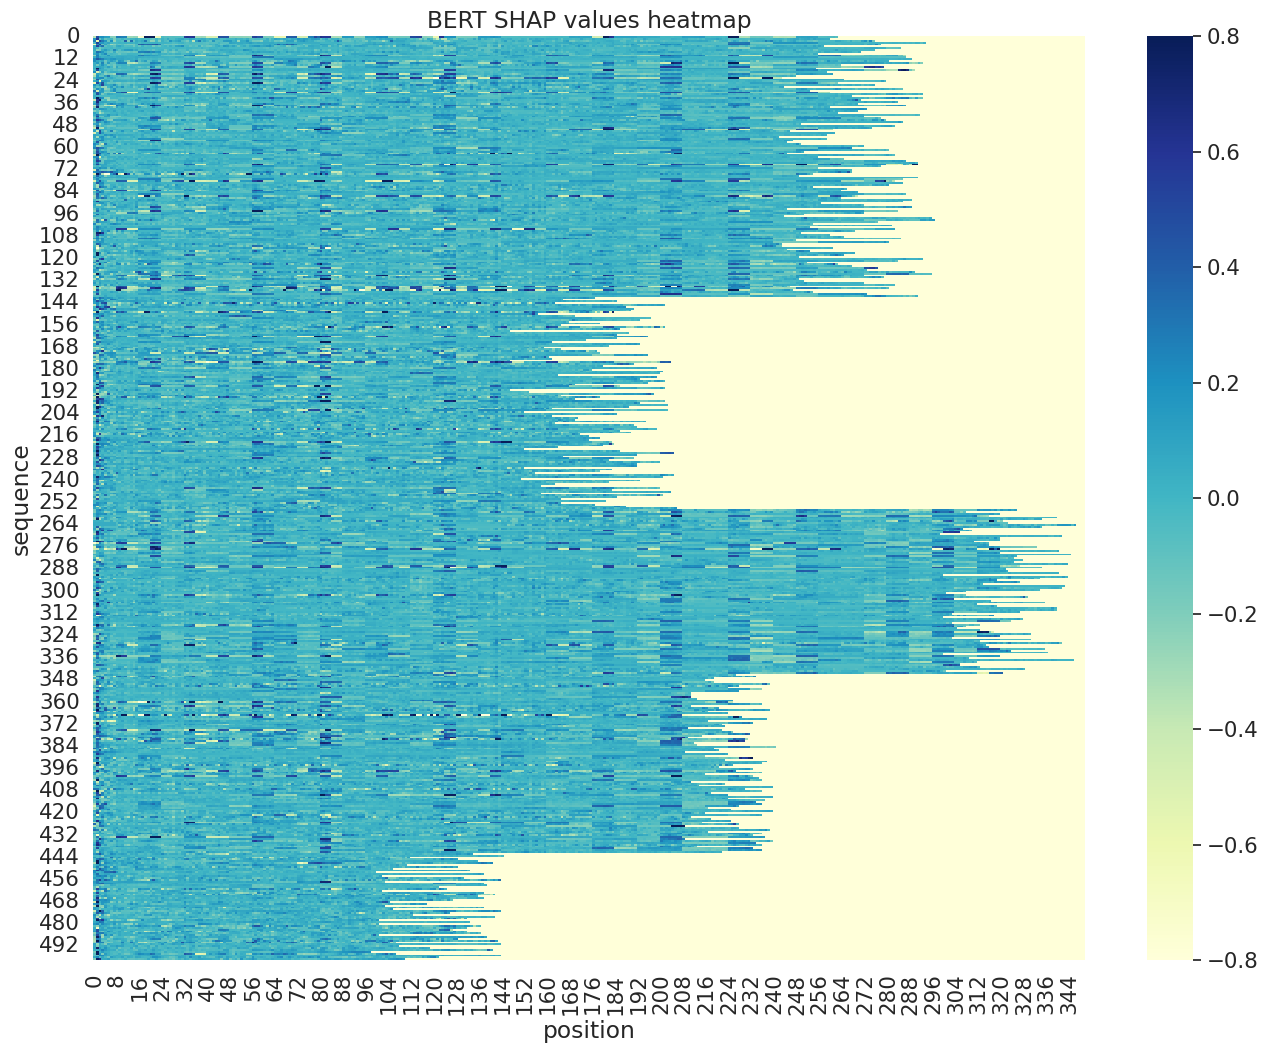

In [ ]:
import seaborn as sns
from matplotlib.pyplot import figure

# uses the predictions from the clustering to group similar sequences together in the heatmap
viz = []
for i in range(5):
    for index, sc in zip(AC_predictions, dt.to_numpy()):
      if index == i:
        viz.append(sc)

figure(figsize=(16, 12), dpi=100)
sns.set(font_scale=1.4)

s = [s for s in viz]
ax = sns.heatmap(s, cmap='YlGnBu', vmin=-1, vmax=1)
ax.set(xlabel='position', ylabel='sequence')
ax.set_title("BERT SHAP values heatmap")